<a href="https://colab.research.google.com/github/mirzab/Complexity/blob/master/Hoteldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/hotel.csv')

In [ ]:
gold_data.head()

,location,hospitality,facilities,cleanliness,value for Money,food,price,overallrating
0,4.7,4.2,4.2,3.7,4.2,2.7,7882,4.3
1,4.6,4.2,4.1,4.1,4.1,2.2,9818,4.3
2,4.7,4.7,4.7,3.9,4.7,2.4,14875,4.7
3,4.9,4.9,4.9,4.5,4.9,3.3,14923,4.9
4,4.8,4.8,4.7,4.6,4.8,1.7,13205,4.8


In [ ]:
df = pd.DataFrame(gold_data)
df.describe()
gold_data.shape
gold_data.info()
# checking the number of missing values
gold_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         609 non-null    float64
 1   hospitality      609 non-null    float64
 2   facilities       609 non-null    float64
 3   cleanliness      609 non-null    float64
 4   value for Money  609 non-null    float64
 5   food             609 non-null    float64
 6   price            609 non-null    int64  
 7   overallrating    609 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 38.2 KB


location           0
hospitality        0
facilities         0
cleanliness        0
value for Money    0
food               0
price              0
overallrating      0
dtype: int64

In [ ]:
# Total missing values for each feature
print(df.isnull().sum())


location           0
hospitality        0
facilities         0
cleanliness        0
value for Money    0
food               0
price              0
overallrating      0
dtype: int64


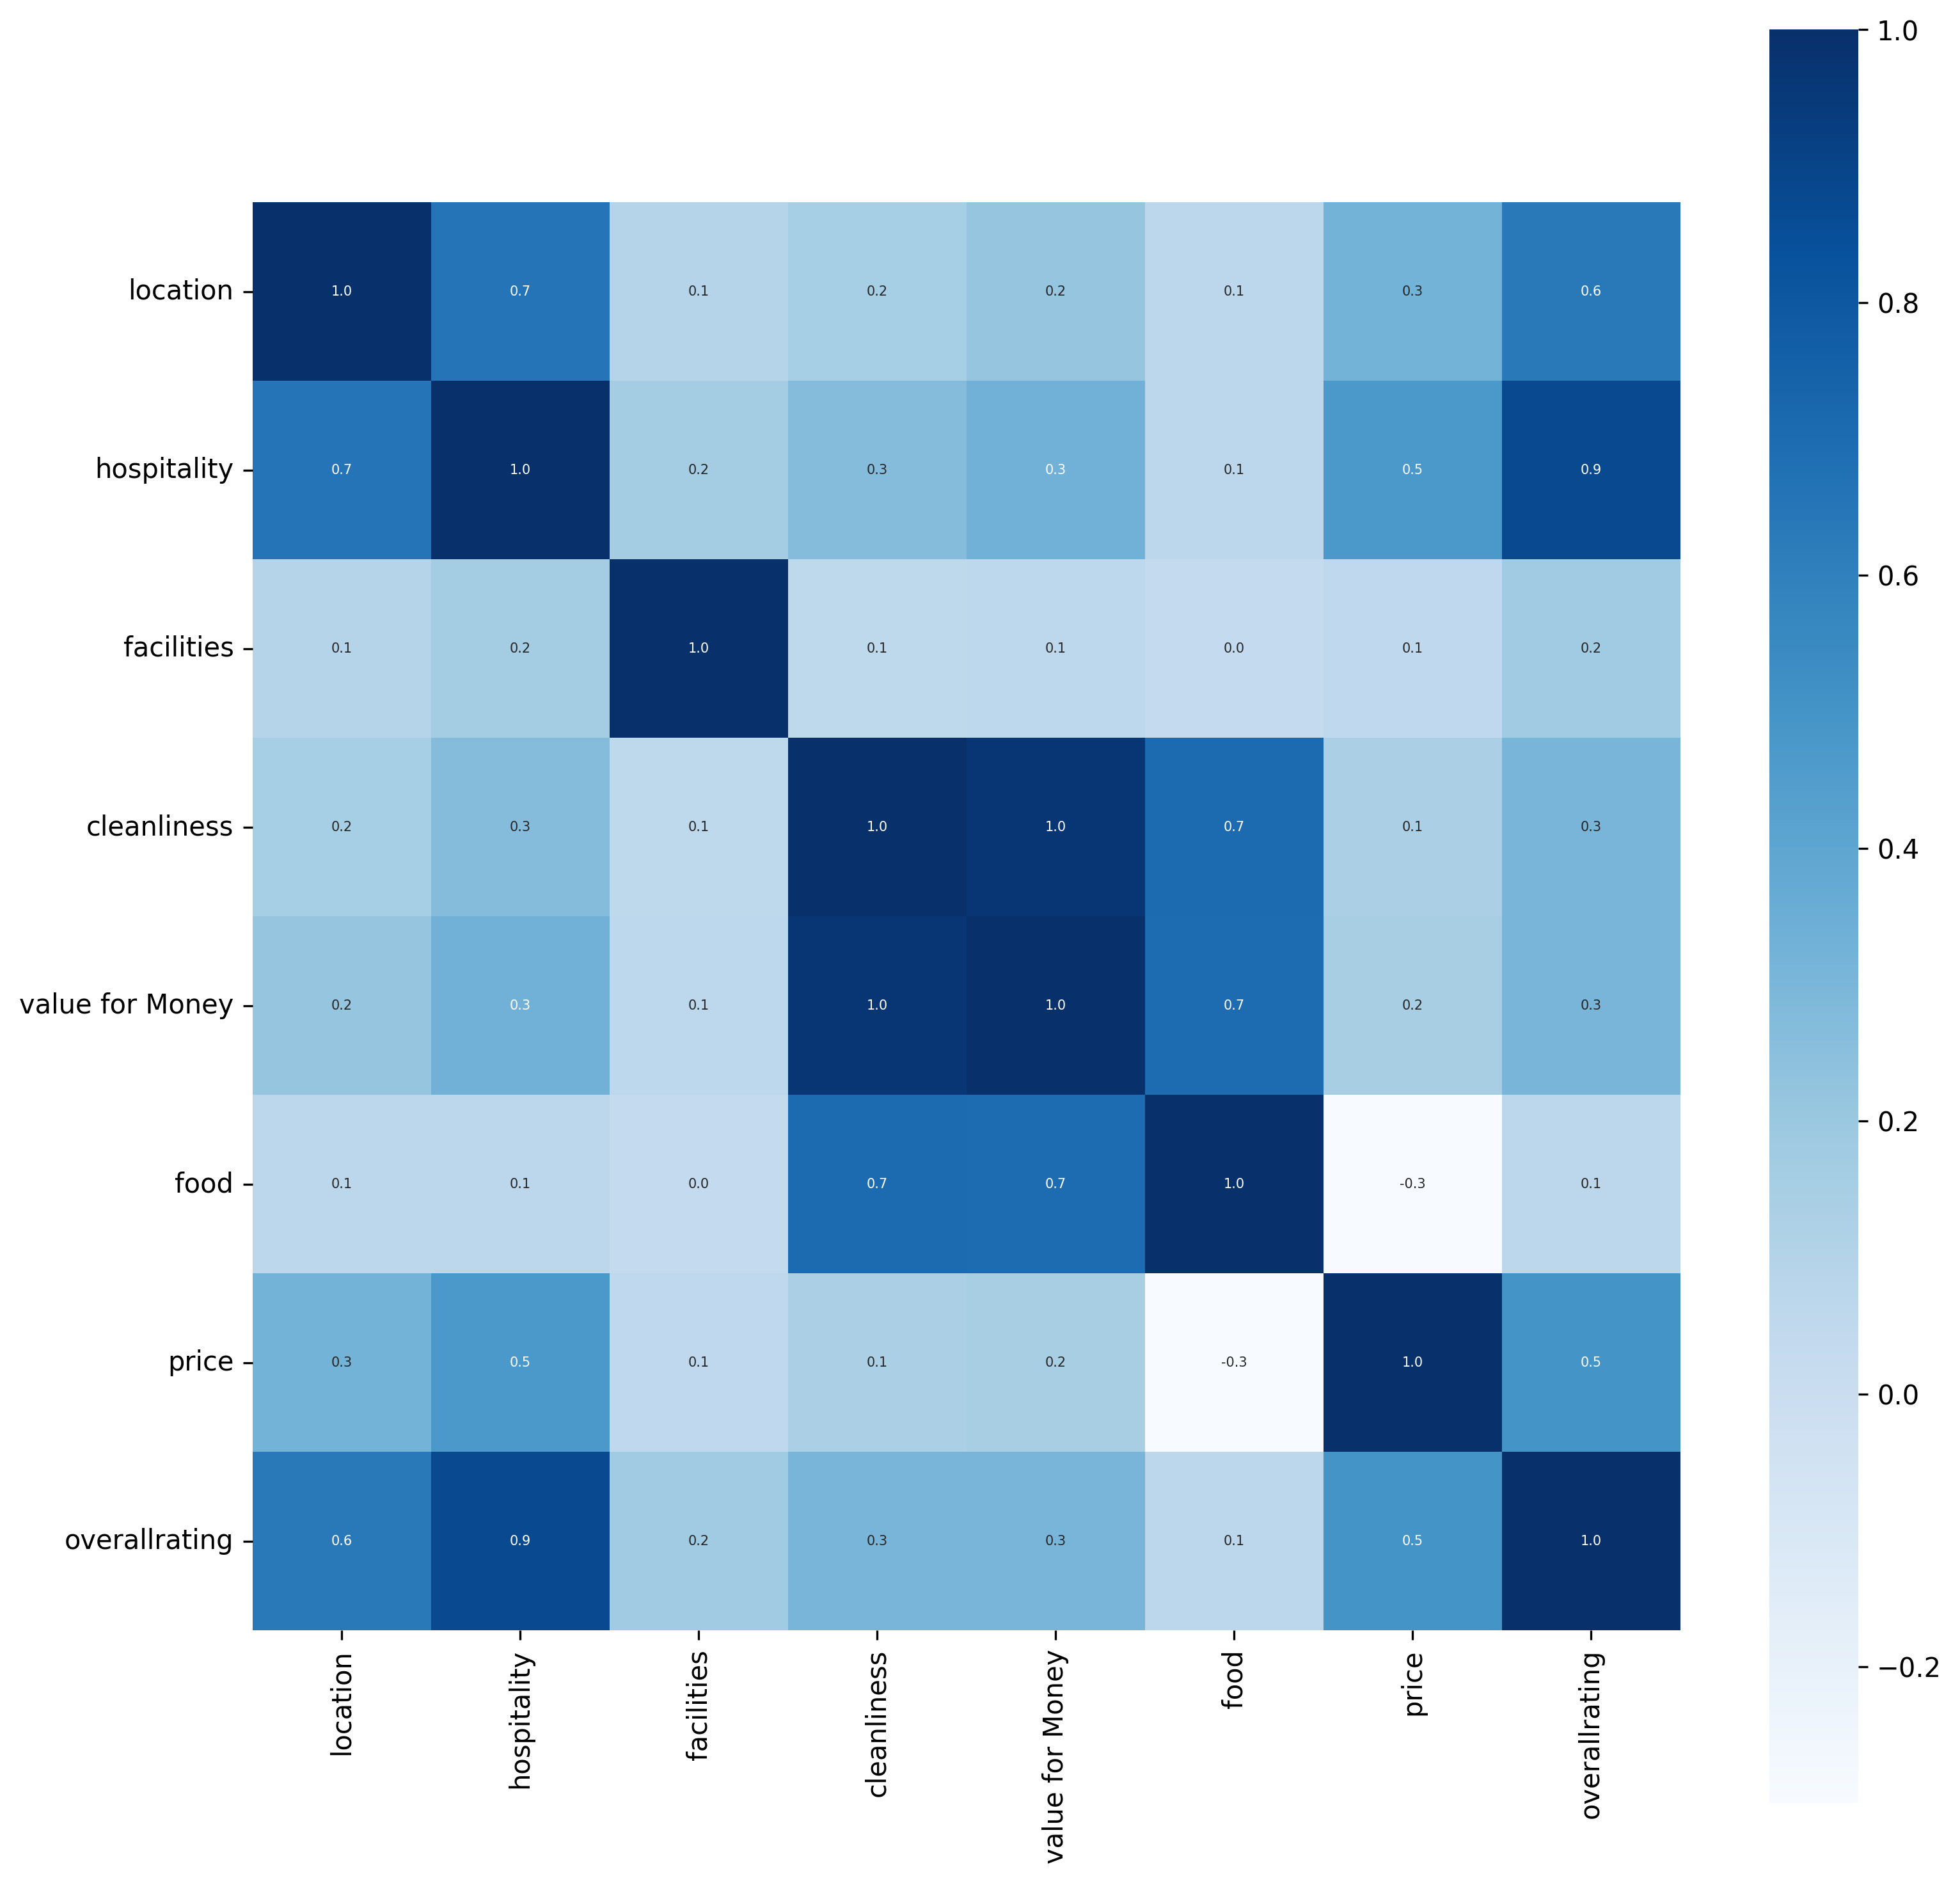

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation = gold_data.corr()

# Set the figure size and DPI for HD plot
plt.figure(figsize=(12, 12), dpi=300)

# Create the heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 5}, cmap='Blues')

# Show the plot
plt.show()


In [ ]:
# correlation values of GLD
print(correlation['price'])

location           0.319687
hospitality        0.476571
facilities         0.054947
cleanliness        0.135292
value for Money    0.151243
food              -0.299955
price              1.000000
overallrating      0.499828
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

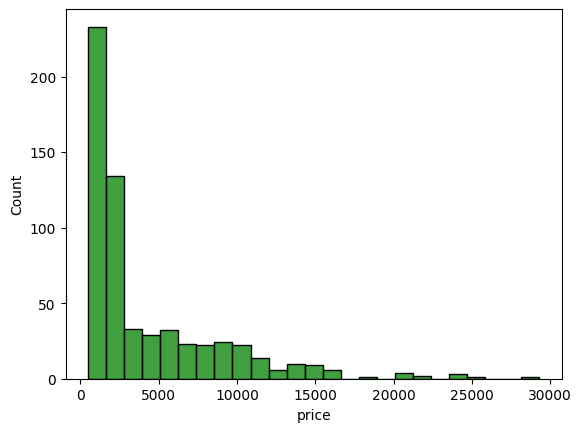

In [ ]:
# checking the distribution of the GLD Price
sns.histplot(gold_data['price'],color='green')

In [ ]:

# Separate features (X) and target variable (y)
X = df.drop(columns=["overallrating"])
y = df["overallrating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.0351314402639254
R-squared: 0.8348030174523453


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Separate features (X) and target variable (y)
X = df.drop(columns=["overallrating"])
y = df["overallrating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("\n")

# You can choose the best-performing model based on the evaluation metrics.


Model: Linear Regression
Mean Squared Error: 0.0351314402639254
R-squared: 0.8348030174523453


Model: Decision Tree Regressor
Mean Squared Error: 0.02016393442622951
R-squared: 0.9051840431682405


Model: Random Forest Regressor
Mean Squared Error: 0.010663360655737628
R-squared: 0.9498581614954715


Model: Support Vector Regressor
Mean Squared Error: 0.1515113911491997
R-squared: 0.2875548383040136




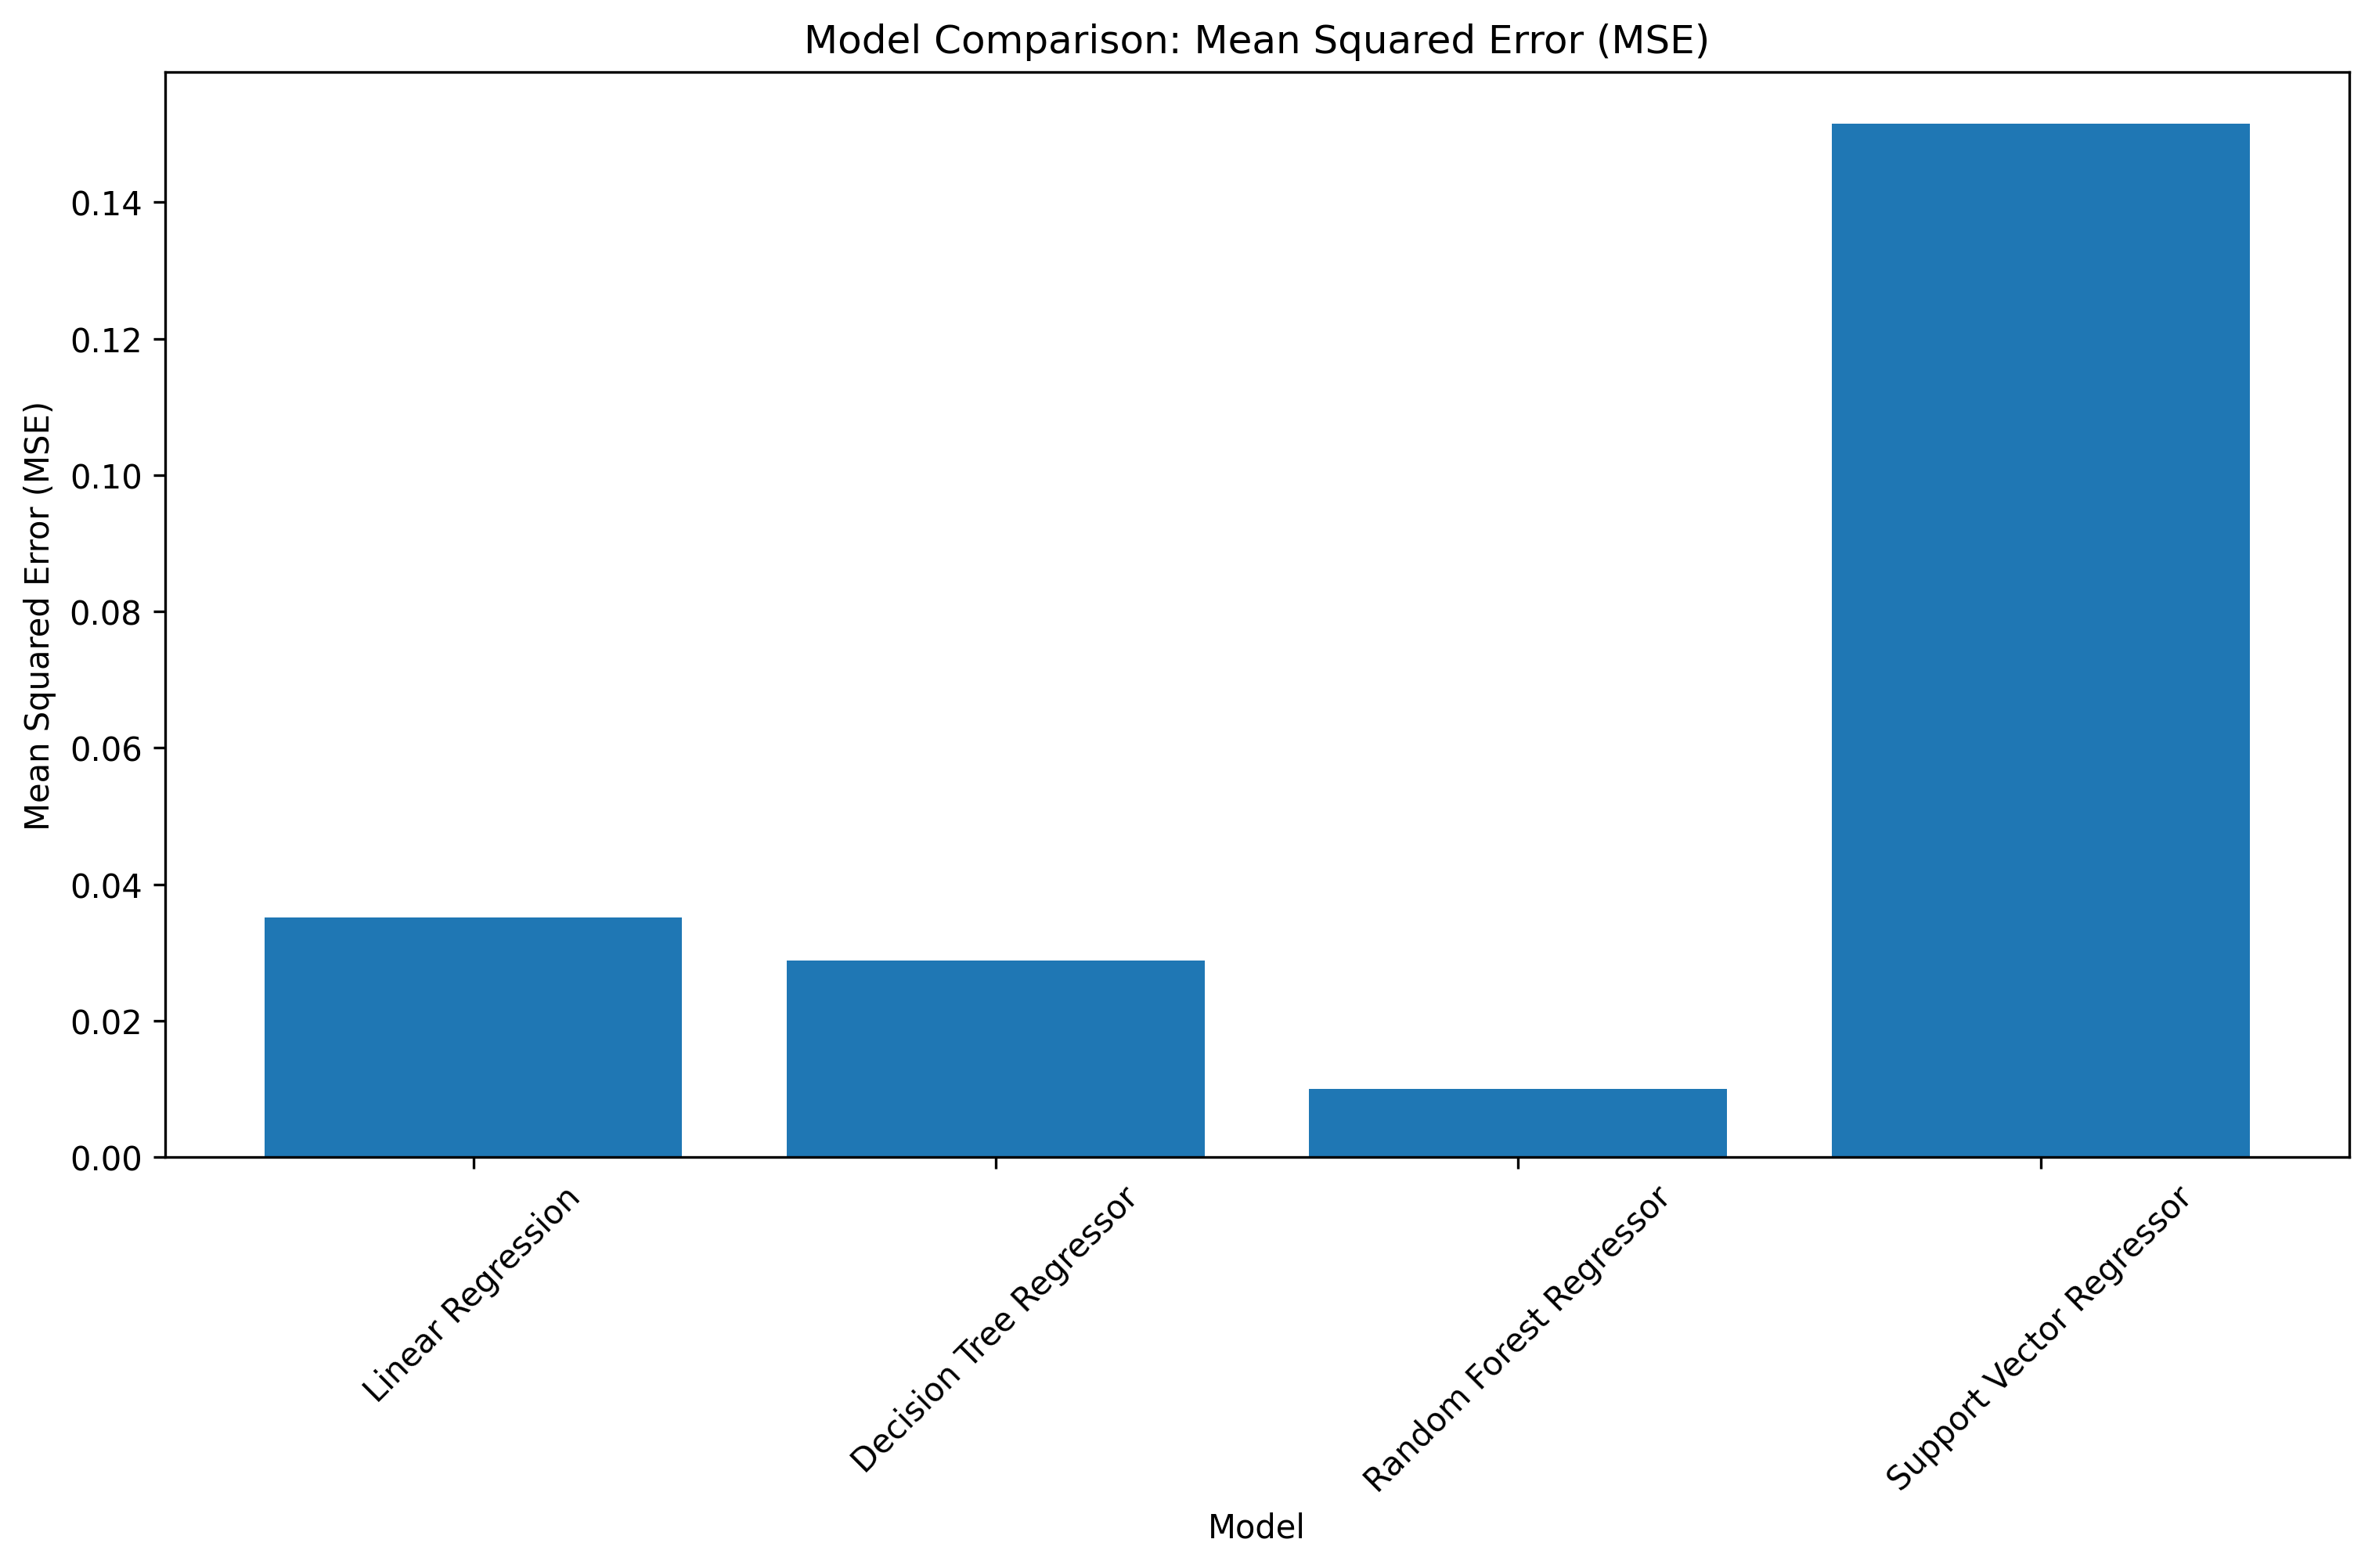

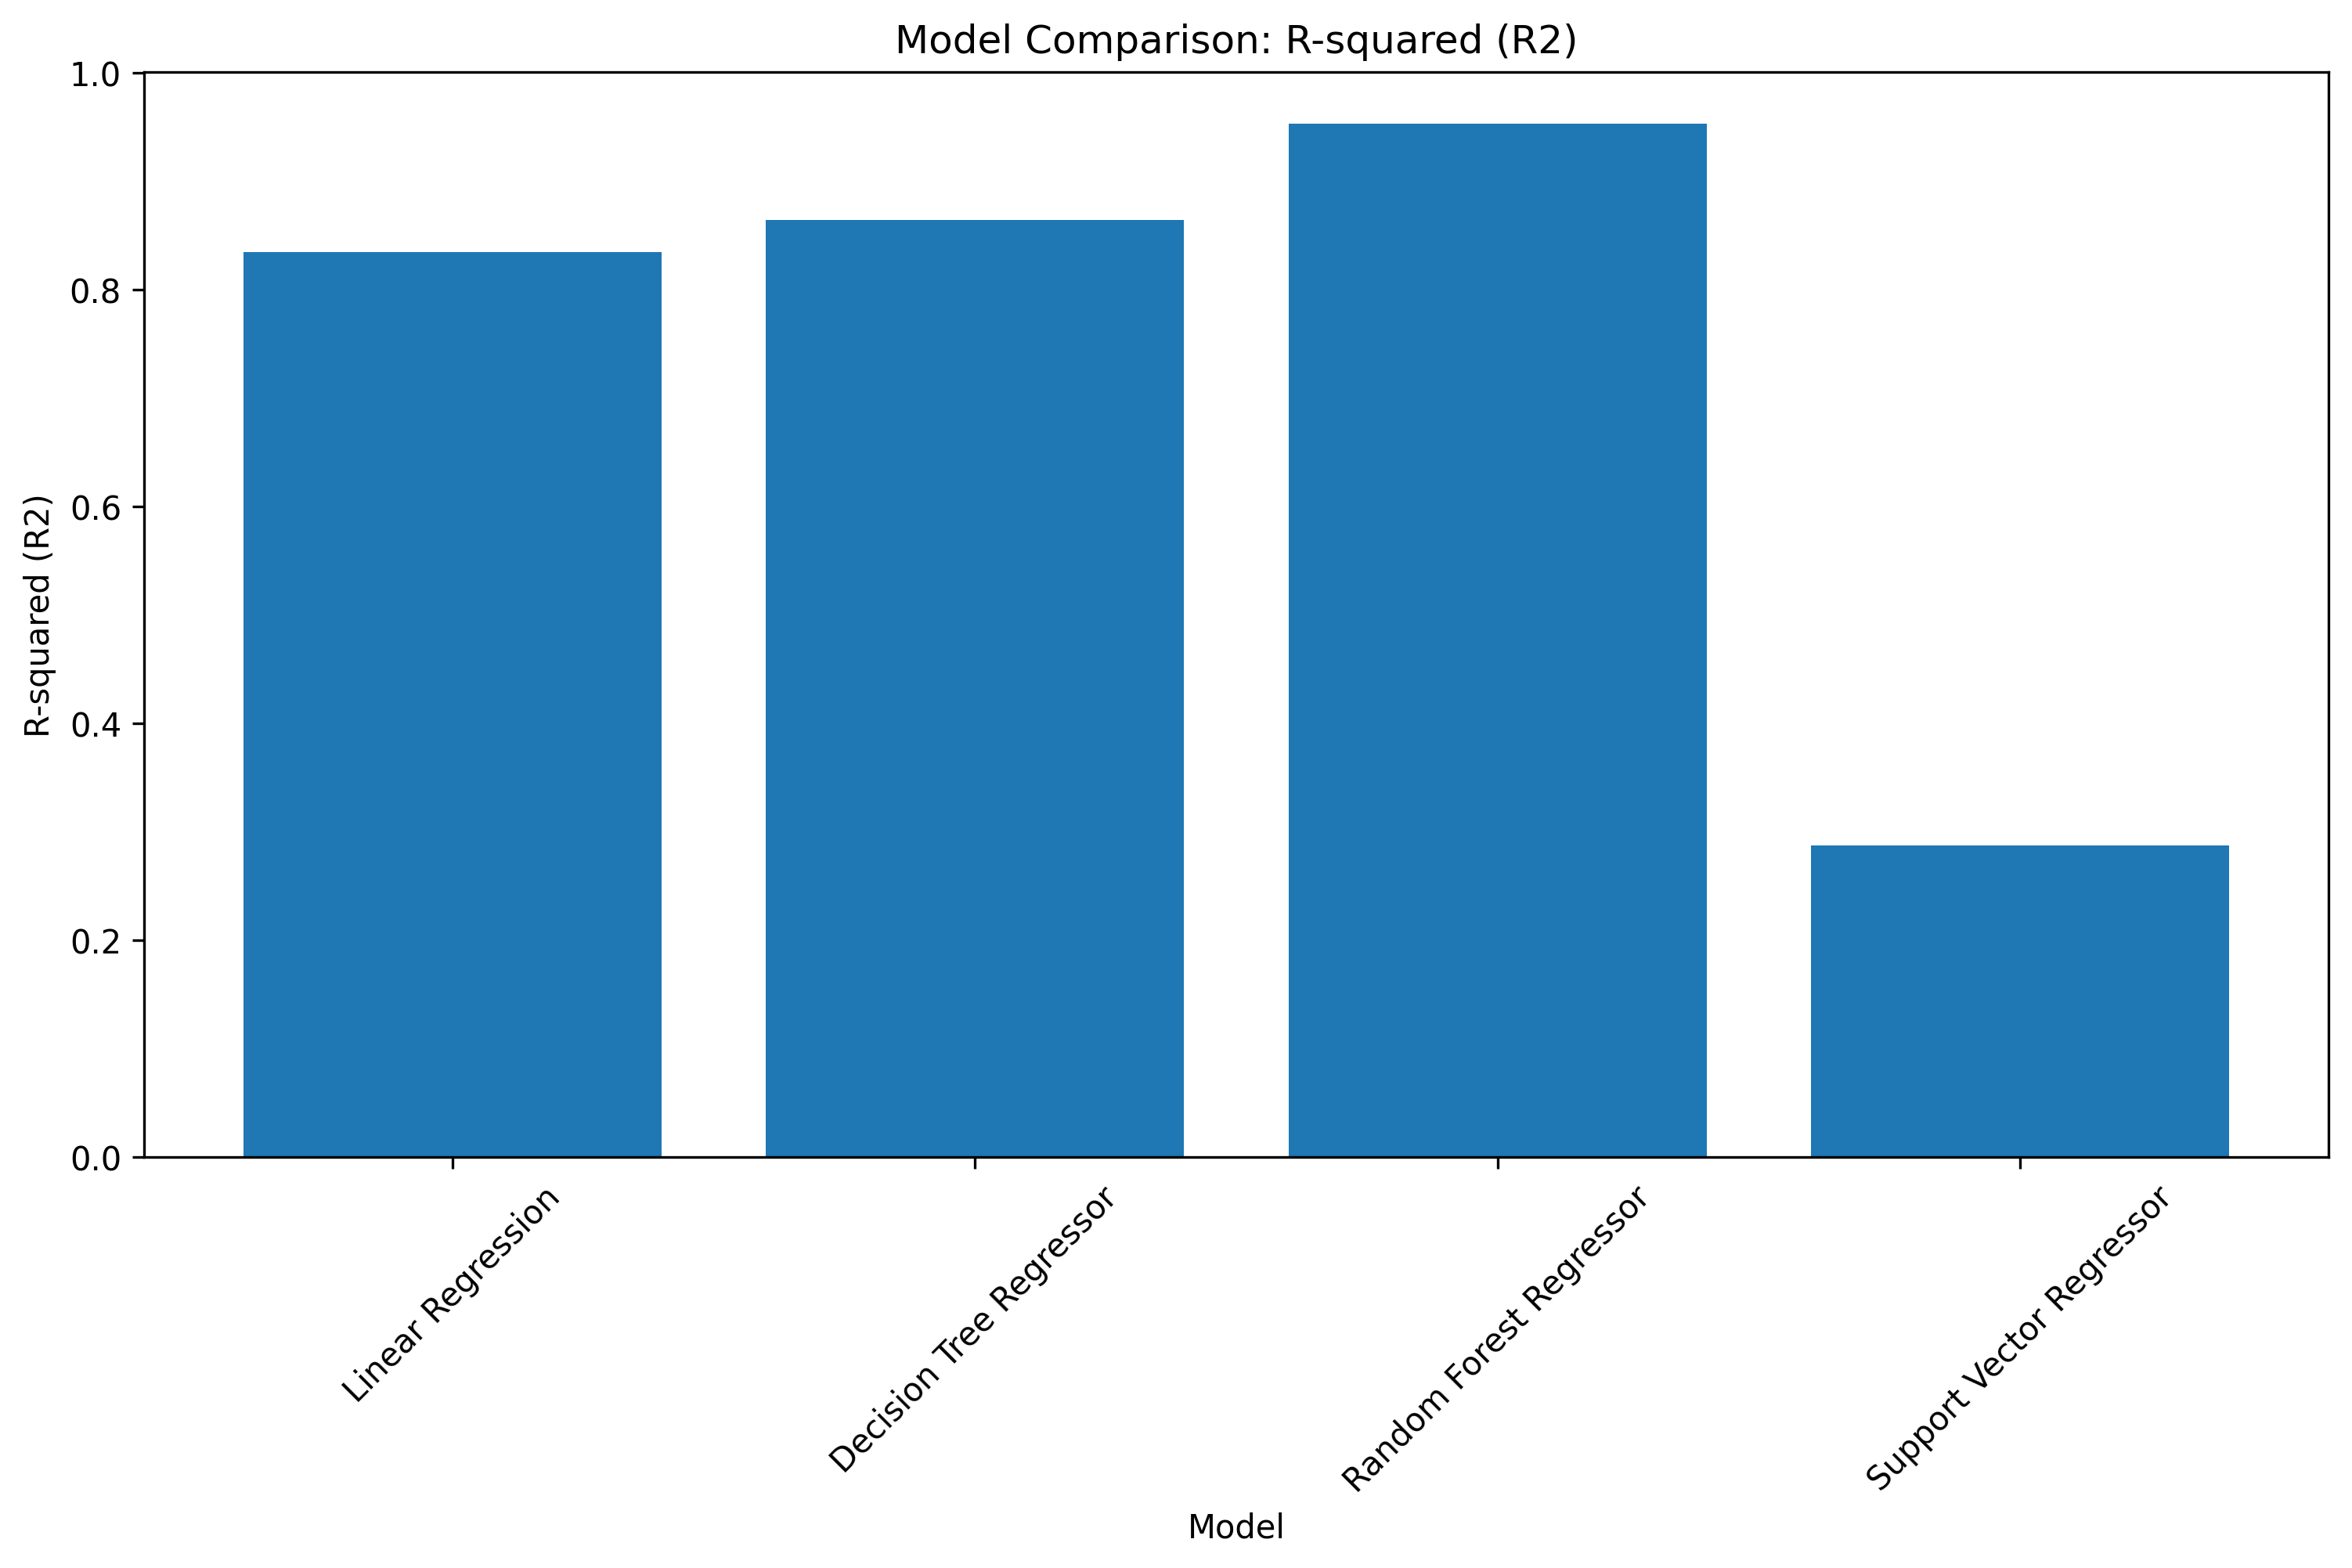

Truth Table for Linear Regression:

     Actual  Predicted
291     3.8   3.856183
365     4.0   3.883835
467     4.2   3.937659
567     4.3   4.192827
118     3.8   4.103007
..      ...        ...
375     4.1   3.996212
249     4.3   4.248948
209     3.8   4.185333
531     3.4   3.593911
199     3.8   3.839172

[122 rows x 2 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target variable (y)
X = df.drop(columns=["overallrating"])
y = df["overallrating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

# Create a DataFrame to store the model evaluation results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the DataFrame
    results.append({"Model": model_name, "MSE": mse, "R2": r2})

# Set the DPI for high-definition plots
dpi = 300

# Create a bar plot of MSE for each model
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6), dpi=dpi)  # Set the figure size and DPI
plt.bar(results_df["Model"], results_df["MSE"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison: Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.show()

# Create a bar plot of R2 for each model
plt.figure(figsize=(12, 6), dpi=dpi)  # Set the figure size and DPI
plt.bar(results_df["Model"], results_df["R2"])
plt.xlabel("Model")
plt.ylabel("R-squared (R2)")
plt.title("Model Comparison: R-squared (R2)")
plt.xticks(rotation=45)
plt.show()

# Create a truth table for a specific model (e.g., Linear Regression)
model_name = "Linear Regression"
model = models[model_name]
y_pred = model.predict(X_test)
truth_table = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(f"Truth Table for {model_name}:\n")
print(truth_table)


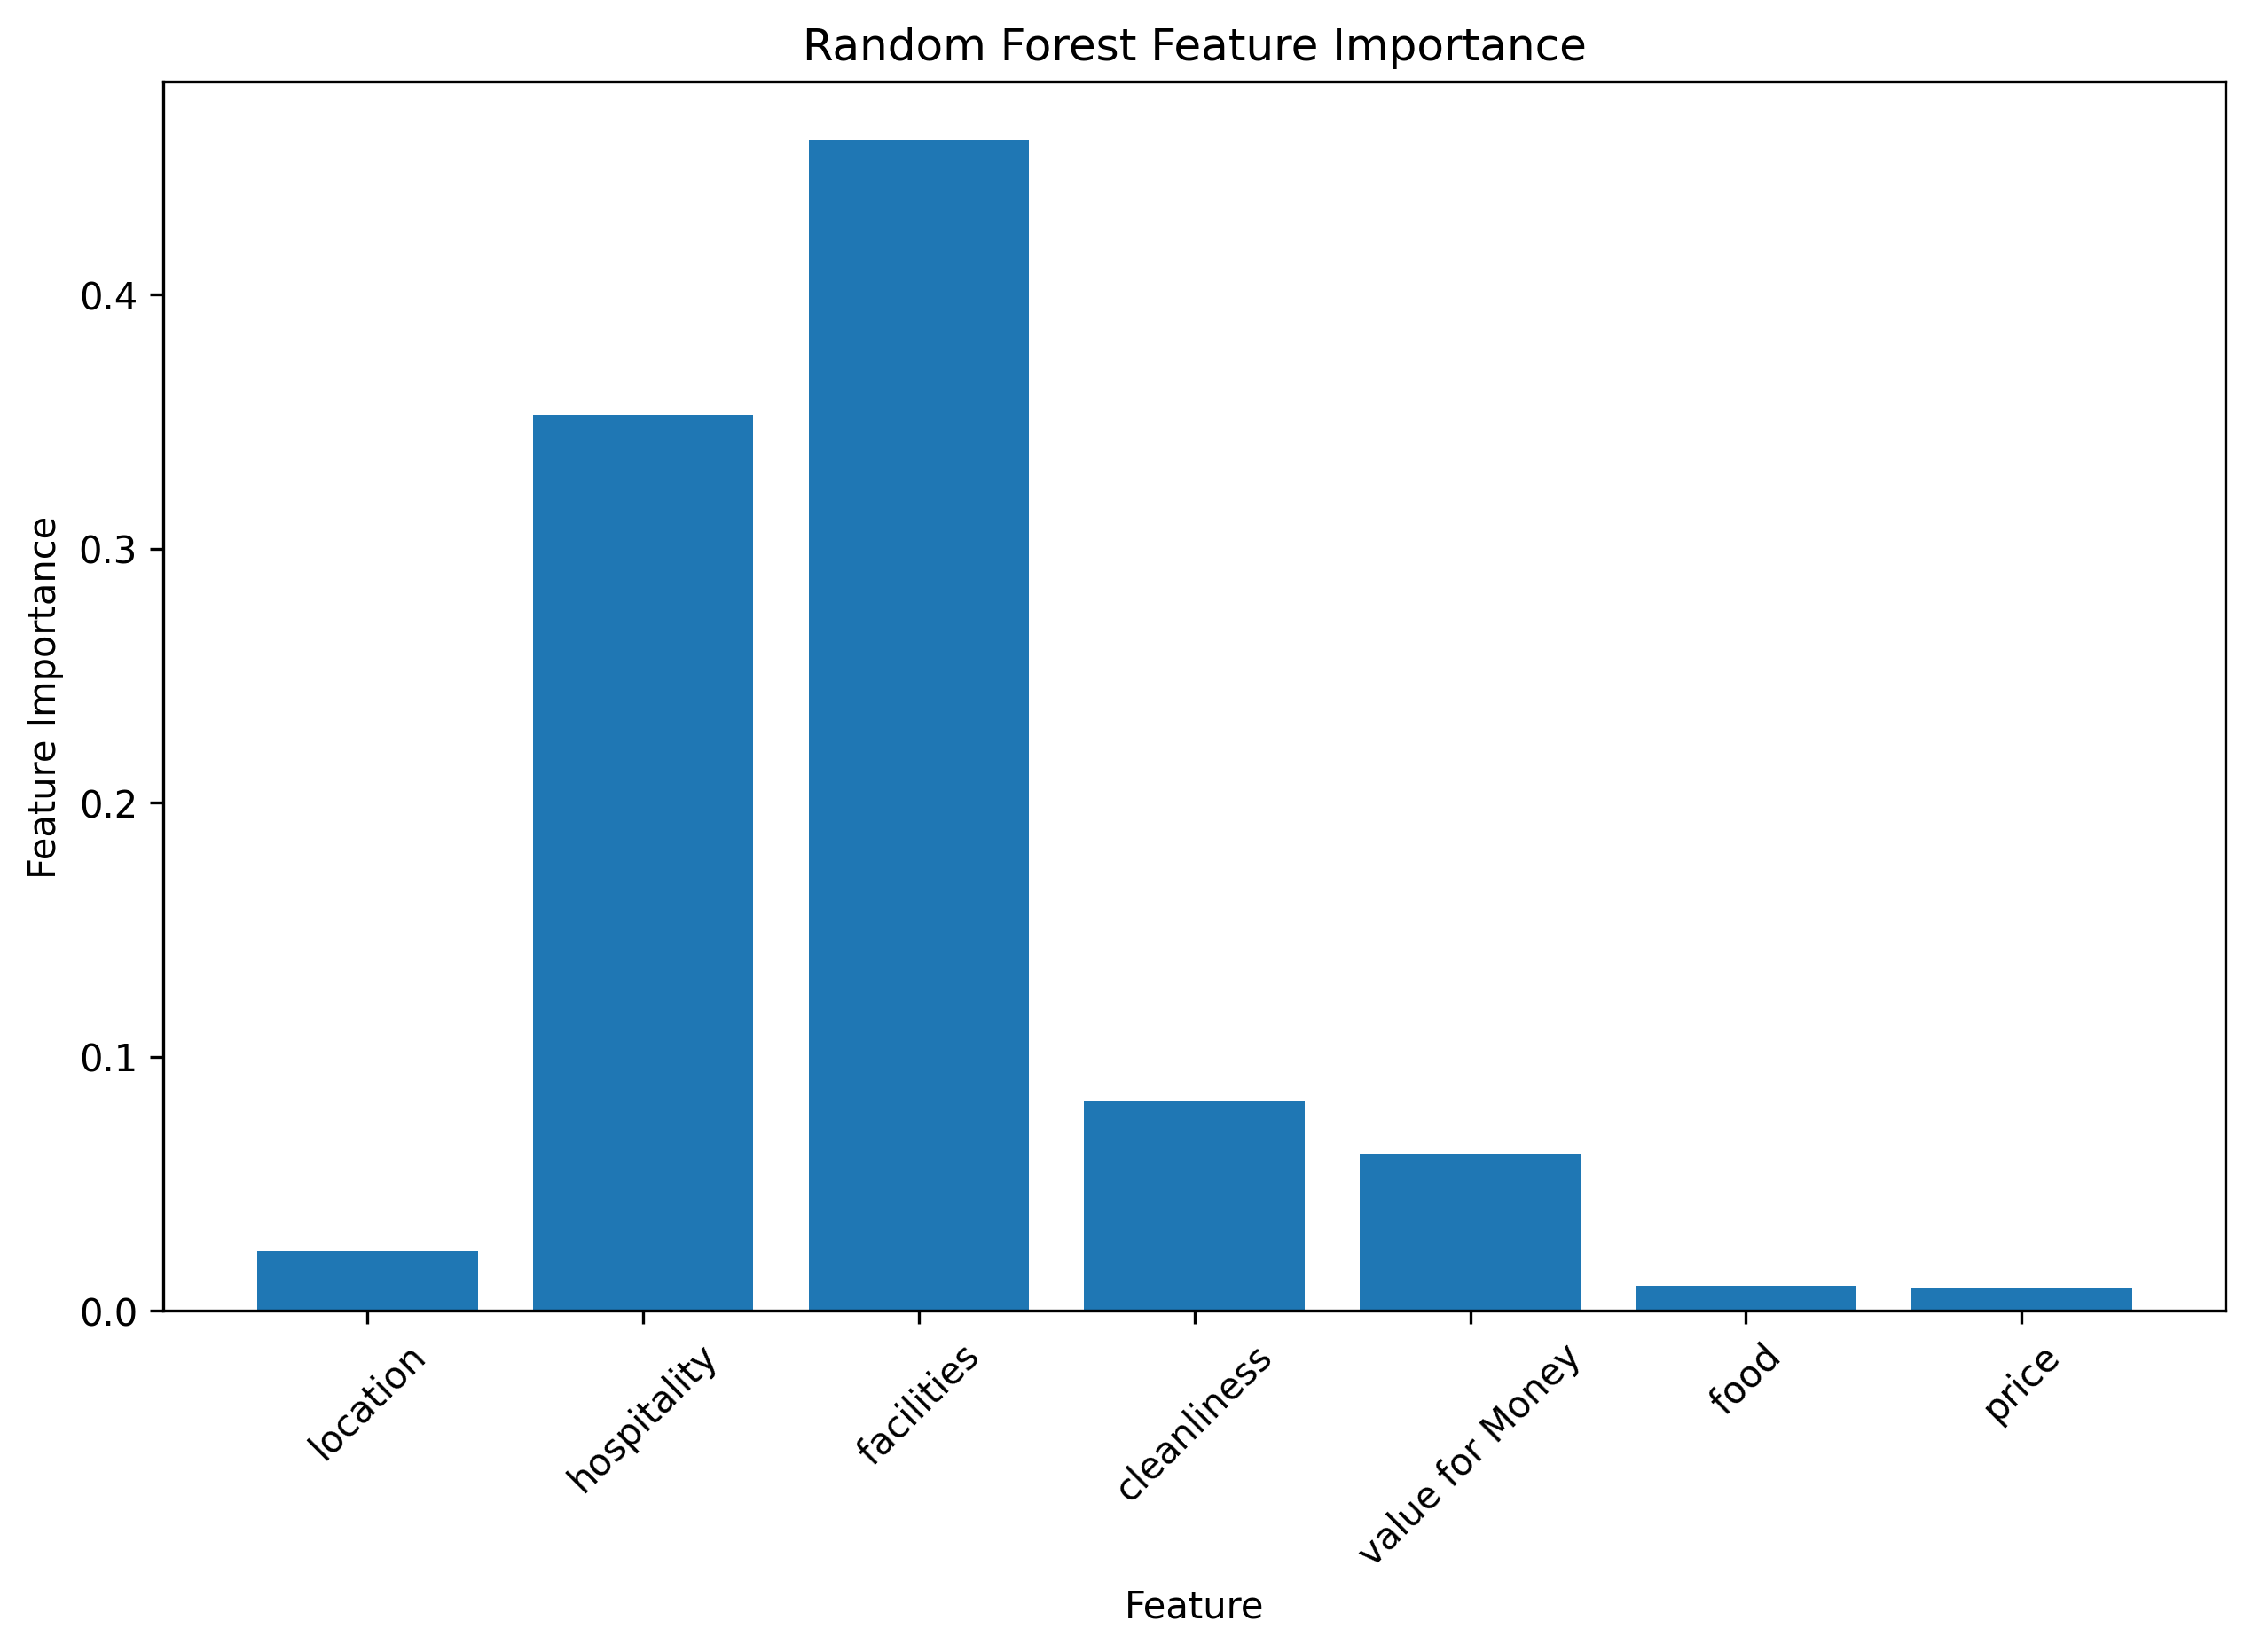

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load your data from a CSV file


# Separate features (X) and target variable (y)
X = df.drop(columns=["overallrating"])
y = df["overallrating"]

# Create and train a Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Get feature importance
feature_importance_rf = model_rf.feature_importances_

# Plot feature importance

# Set the DPI for high-definition plots
dpi = 300
plt.figure(figsize=(10, 6),dpi=dpi)
plt.bar(X.columns, feature_importance_rf)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.show()


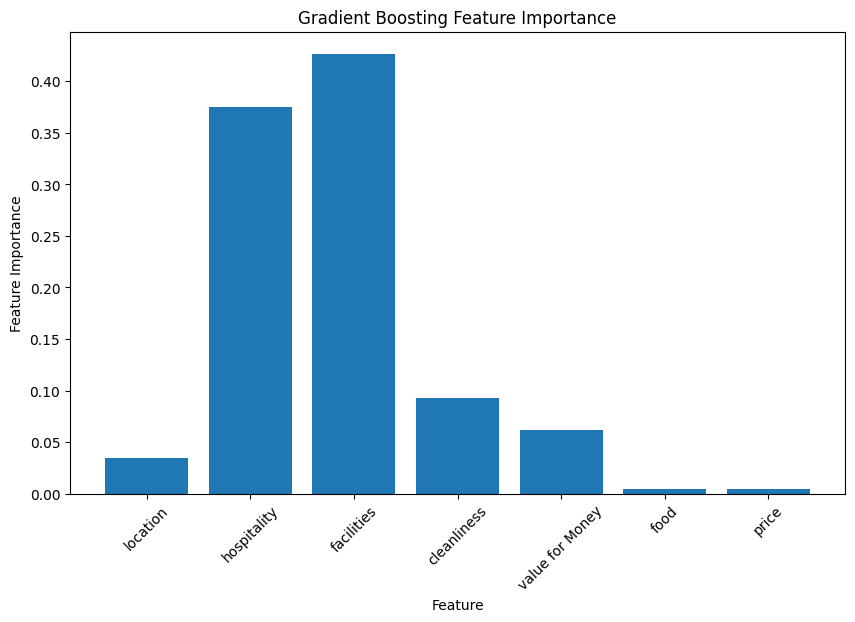

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train a Gradient Boosting model
model_gb = GradientBoostingRegressor()
model_gb.fit(X, y)

# Get feature importance
feature_importance_gb = model_gb.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance_gb)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.xticks(rotation=45)
plt.show()


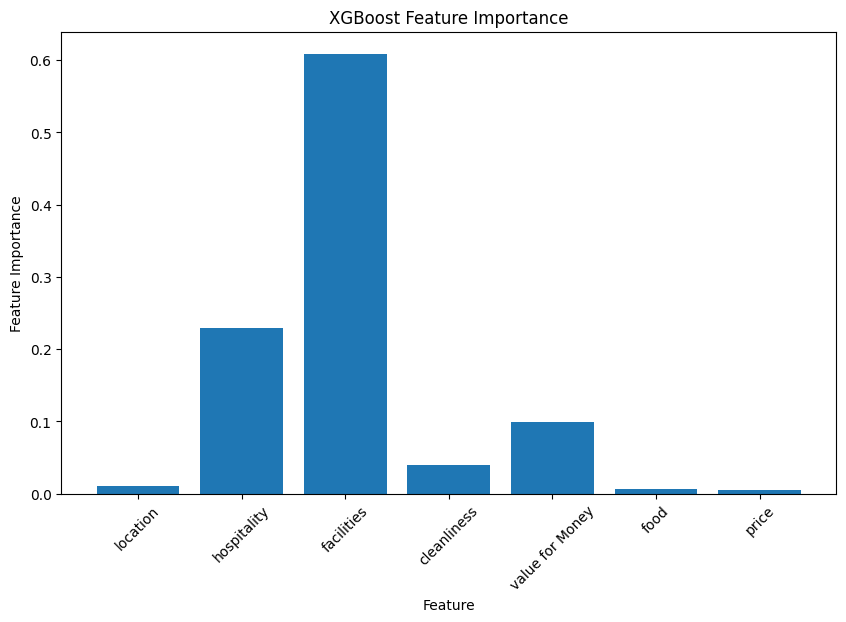

In [ ]:
import xgboost as xgb

# Create and train an XGBoost model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X, y)

# Get feature importance
feature_importance_xgb = model_xgb.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance_xgb)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df1 = df

# Remove whitespace from feature names
df1.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

# Display the DataFrame with updated feature names
print(df1)

# Separate features (X) and target variable (y)
X = df1.drop(columns=["overallrating"])
y = df1["overallrating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for the LightGBM model
params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "metric": "mse",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test data
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


     location  hospitality  facilities  cleanliness  value_for_Money  food  \
0         4.7          4.2         4.2          3.7              4.2   2.7   
1         4.6          4.2         4.1          4.1              4.1   2.2   
2         4.7          4.7         4.7          3.9              4.7   2.4   
3         4.9          4.9         4.9          4.5              4.9   3.3   
4         4.8          4.8         4.7          4.6              4.8   1.7   
..        ...          ...         ...          ...              ...   ...   
604       3.9          3.6         3.5          4.0              4.1   3.0   
605       4.2          3.9         4.1          3.9              4.1   4.1   
606       4.3          3.9         3.9          4.1              3.9   3.9   
607       3.9          4.3         4.3          4.7              4.3   4.4   
608       4.6          3.8         4.0          3.9              4.0   3.6   

     price  overallrating  
0     7882            4.3  
1     9

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your regression data from a CSV file (X: features, y: target)
df = pd.read_csv("hotel.csv")

# Separate features (X) and target variable (y)
X = df.drop(columns=["overallrating"])
y = df["overallrating"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression models
knn_model = KNeighborsRegressor()
rf_model = RandomForestRegressor()
lgbm_model = lgb.LGBMRegressor()

knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate regression metrics
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y_test, lgbm_pred)

# Print the results
print("K-Nearest Neighbors (KNN):")
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("R-squared (R2):", knn_r2)

print("\nRandom Forest (RF):")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared (R2):", rf_r2)

print("\nLightGBM (LGBM):")
print("MSE:", lgbm_mse)
print("RMSE:", lgbm_rmse)
print("R-squared (R2):", lgbm_r2)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 7
[LightGBM] [Info] Start training from score 3.999589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

Explained Variance Ratio PC1: 0.9400414174003828
Explained Variance Ratio PC2: 0.059958582599617165


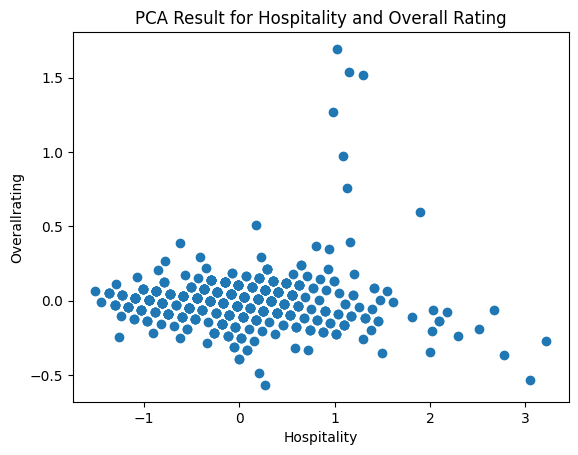

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Select the two columns for PCA
X = df[["hospitality", "overallrating"]]

# Instantiate PCA with the number of components you want
n_components = 2  # Choose the number of components you want
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
pca_result = pca.fit_transform(X)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i in range(n_components):
    print(f"Explained Variance Ratio PC{i + 1}: {explained_variance_ratio[i]}")

# Plot the data in the reduced dimension
if n_components == 2:
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.xlabel("Hospitality")
    plt.ylabel("Overallrating")
    plt.title("PCA Result for Hospitality and Overall Rating")
    plt.show()


Explained Variance Ratio PC1: 0.9400414174003828
Explained Variance Ratio PC2: 0.059958582599617165


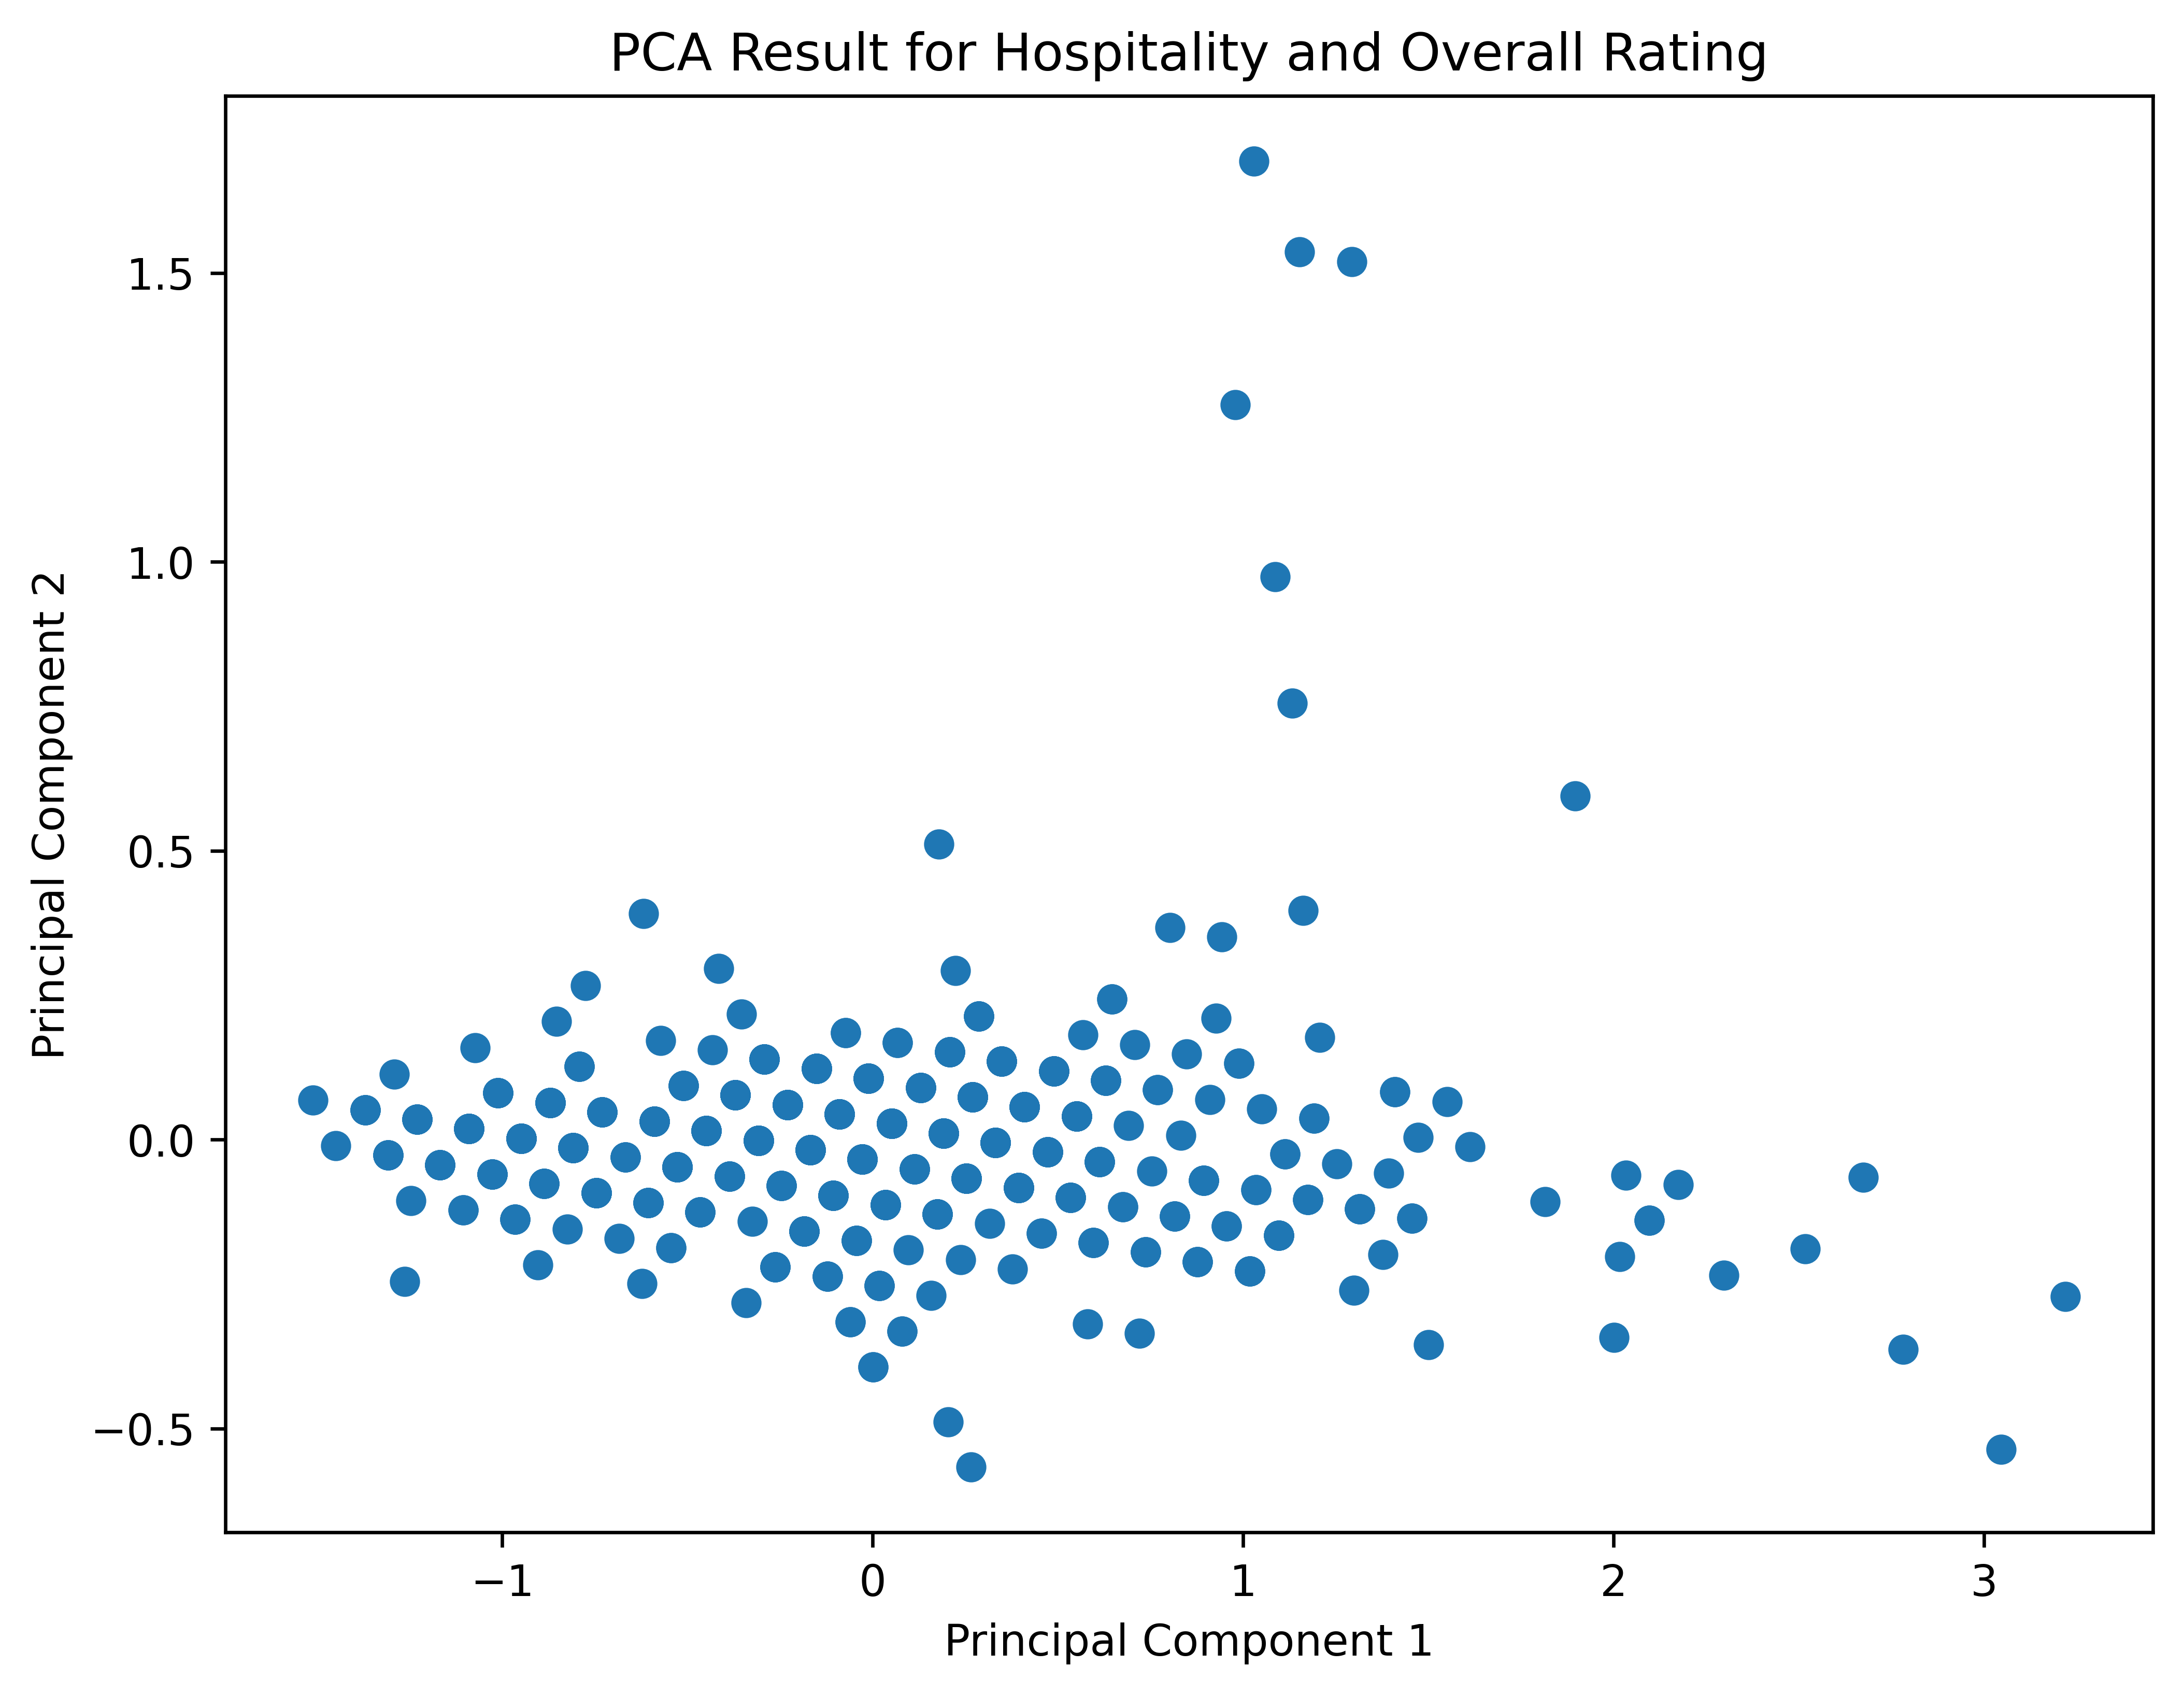

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Select the two columns for PCA
X = df[["hospitality", "overallrating"]]

# Instantiate PCA with the number of components you want
n_components = 2  # Choose the number of components you want
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
pca_result = pca.fit_transform(X)

# Create a high-definition (HD) figure
plt.figure(figsize=(8, 6), dpi=600)  # Adjust figsize and dpi for HD quality

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i in range(n_components):
    print(f"Explained Variance Ratio PC{i + 1}: {explained_variance_ratio[i]}")

# Plot the data in the reduced dimension
if n_components == 2:
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Result for Hospitality and Overall Rating")

    # Save the HD-quality graph to a file (e.g., PNG)
    plt.savefig("pca_hd_graph.png", bbox_inches='tight', pad_inches=0.1, format='png')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

# Load your dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=["overallrating"])  # Features
y = df["overallrating"]  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regressors
regressors = [
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Initialize results dictionary to store performance metrics
results = {}

# Iterate through regressors
for reg_name, reg in regressors:
    try:
        # Initialize the Sequential Forward Selector (SFS)
        sfs = SequentialFeatureSelector(reg,
                                       k_features="best",  # Select the best subset of features
                                       forward=True,  # Perform forward selection
                                       scoring="neg_mean_squared_error",  # Use mean squared error as the evaluation metric
                                       cv=5)  # 5-fold cross-validation

        # Perform SFS on the training data
        sfs = sfs.fit(X_train, y_train)

        # Get the selected feature indices
        selected_indices = list(sfs.k_feature_idx_)

        # Train a regressor using the selected features
        reg_selected = reg.fit(X_train.iloc[:, selected_indices], y_train)

        # Make predictions on the test data
        y_pred = reg_selected.predict(X_test.iloc[:, selected_indices])

        # Calculate mean squared error and R-squared on the test data
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store performance metrics in results dictionary
        results[reg_name] = {"Mean Squared Error": mse, "R-squared": r2}
    except Exception as e:
        print(f"Fit failed for {reg_name}: {str(e)}")

# Display the performance metrics
for reg_name, metrics in results.items():
    print(f"{reg_name} Metrics:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print()


Random Forest Regressor Metrics:
Mean Squared Error: 0.0102
R-squared: 0.9520

Gradient Boosting Regressor Metrics:
Mean Squared Error: 0.0093
R-squared: 0.9563

Linear Regression Metrics:
Mean Squared Error: 0.0551
R-squared: 0.7407



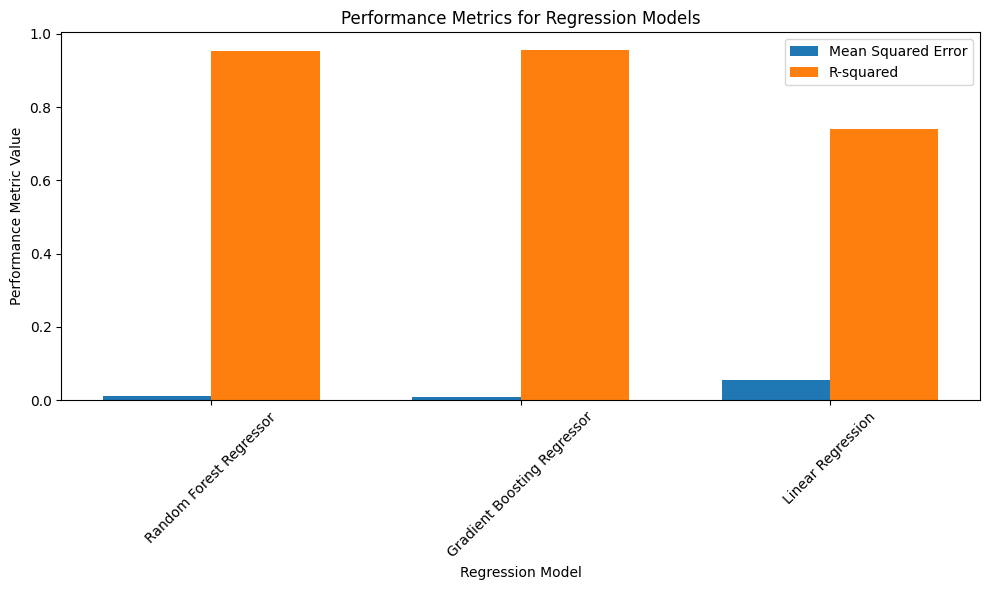

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

# Load your dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=["overallrating"])  # Features
y = df["overallrating"]  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regressors
regressors = [
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Initialize results dictionary to store performance metrics
results = {}

# Iterate through regressors
for reg_name, reg in regressors:
    try:
        # Initialize the Sequential Forward Selector (SFS)
        sfs = SequentialFeatureSelector(reg,
                                       k_features="best",  # Select the best subset of features
                                       forward=True,  # Perform forward selection
                                       scoring="neg_mean_squared_error",  # Use mean squared error as the evaluation metric
                                       cv=5)  # 5-fold cross-validation

        # Perform SFS on the training data
        sfs = sfs.fit(X_train, y_train)

        # Get the selected feature indices
        selected_indices = list(sfs.k_feature_idx_)

        # Train a regressor using the selected features
        reg_selected = reg.fit(X_train.iloc[:, selected_indices], y_train)

        # Make predictions on the test data
        y_pred = reg_selected.predict(X_test.iloc[:, selected_indices])

        # Calculate mean squared error and R-squared on the test data
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store performance metrics in results dictionary
        results[reg_name] = {"Mean Squared Error": mse, "R-squared": r2}
    except Exception as e:
        print(f"Fit failed for {reg_name}: {str(e)}")

# Extract the performance metrics for plotting
metric_names = ["Mean Squared Error", "R-squared"]
model_names = list(results.keys())
metric_values = [[results[model][metric] for model in model_names] for metric in metric_names]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(model_names))

for i, metric_name in enumerate(metric_names):
    ax.bar(x + i * width, metric_values[i], width, label=metric_name)

ax.set_xlabel("Regression Model")
ax.set_ylabel("Performance Metric Value")
ax.set_title("Performance Metrics for Regression Models")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


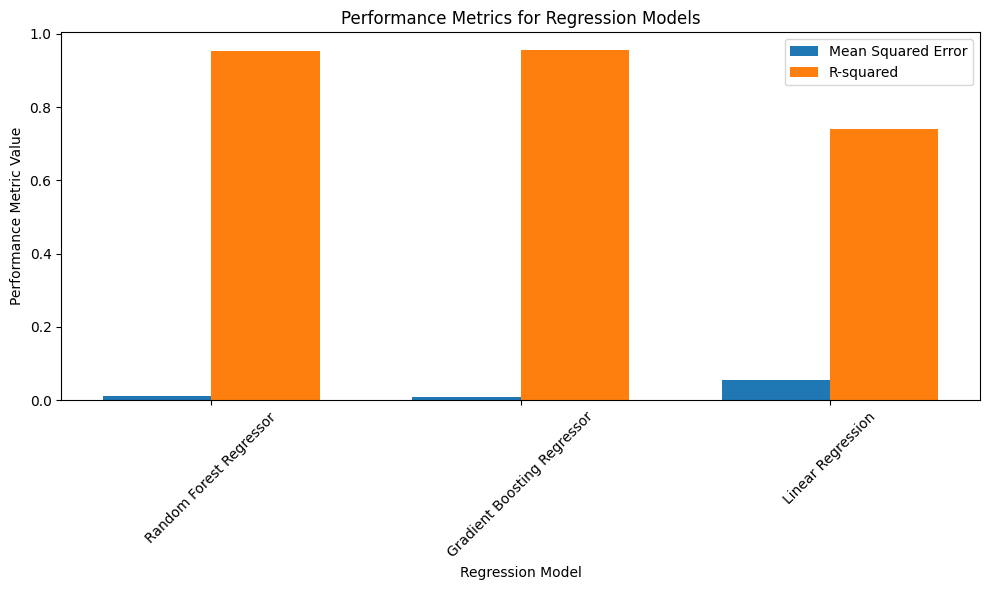

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

# Load your dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=["overallrating"])  # Features
y = df["overallrating"]  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regressors
regressors = [
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Initialize results dictionary to store performance metrics
results = {}

# Iterate through regressors
for reg_name, reg in regressors:
    try:
        # Initialize the Sequential Forward Selector (SFS)
        sfs = SequentialFeatureSelector(reg,
                                       k_features="best",  # Select the best subset of features
                                       forward=True,  # Perform forward selection
                                       scoring="neg_mean_squared_error",  # Use mean squared error as the evaluation metric
                                       cv=5)  # 5-fold cross-validation

        # Perform SFS on the training data
        sfs = sfs.fit(X_train, y_train)

        # Get the selected feature indices
        selected_indices = list(sfs.k_feature_idx_)

        # Train a regressor using the selected features
        reg_selected = reg.fit(X_train.iloc[:, selected_indices], y_train)

        # Make predictions on the test data
        y_pred = reg_selected.predict(X_test.iloc[:, selected_indices])

        # Calculate mean squared error and R-squared on the test data
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store performance metrics in results dictionary
        results[reg_name] = {"Mean Squared Error": mse, "R-squared": r2}
    except Exception as e:
        print(f"Fit failed for {reg_name}: {str(e)}")

# Extract the performance metrics for plotting
metric_names = ["Mean Squared Error", "R-squared"]
model_names = list(results.keys())
metric_values = [[results[model][metric] for model in model_names] for metric in metric_names]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(model_names))

for i, metric_name in enumerate(metric_names):
    ax.bar(x + i * width, metric_values[i], width, label=metric_name)

ax.set_xlabel("Regression Model")
ax.set_ylabel("Performance Metric Value")
ax.set_title("Performance Metrics for Regression Models")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


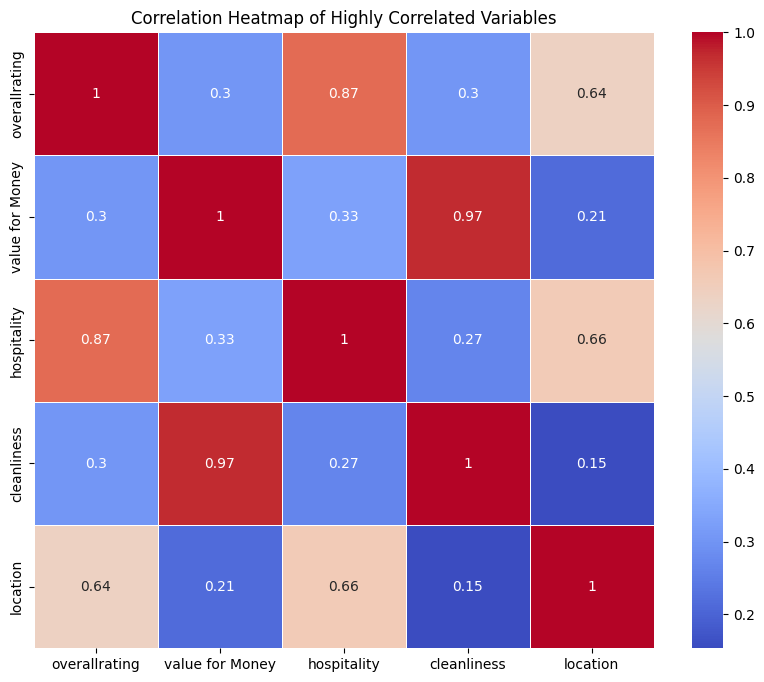

Highly Correlated Variables:
overallrating
value for Money
hospitality
cleanliness
location


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the top three highly correlated variable pairs
n = 3  # Number of highly correlated variable pairs to find
correlated_pairs = (corr_matrix
                    .unstack()
                    .sort_values(ascending=False)
                    .drop_duplicates()
                    .head(n))

# Extract the variable names from the pairs
variable_names = set()
for pair in correlated_pairs.index:
    variable_names.add(pair[0])
    variable_names.add(pair[1])

# Create a subset of the dataframe with the highly correlated variables
subset_df = df[list(variable_names)]

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Highly Correlated Variables")
plt.show()

# Print the names of the highly correlated variables
print("Highly Correlated Variables:")
for name in variable_names:
    print(name)


<Figure size 3600x2400 with 0 Axes>

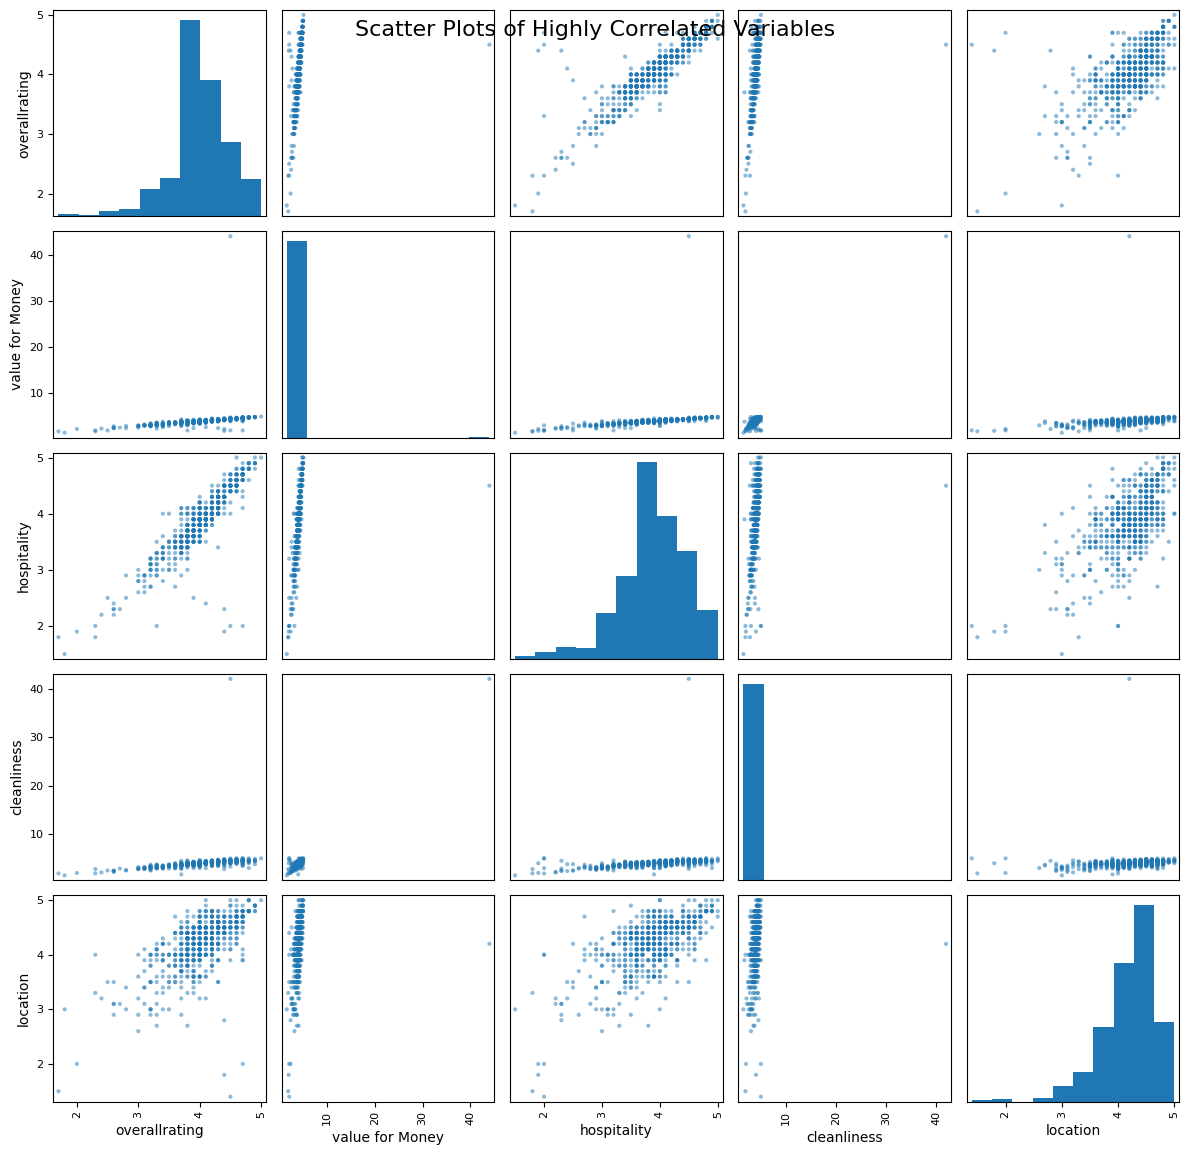

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from "hotel.csv"
df = pd.read_csv("hotel.csv")

# Select the columns of interest
columns_of_interest = ['overallrating', 'value for Money', 'hospitality', 'cleanliness', 'location']
subset_df = df[columns_of_interest]

# Create a figure with high resolution (adjust as needed)
plt.figure(figsize=(12, 8), dpi=300)

# Create scatter plots for each combination of variables
scatter_matrix = pd.plotting.scatter_matrix(subset_df, alpha=0.5, figsize=(12, 12), diagonal='hist')

# Add labels to the scatter plots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)

plt.suptitle("Scatter Plots of Highly Correlated Variables", y=0.95, fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot in HD quality (adjust the filename as needed)
plt.savefig("scatter_plot_hd.png", dpi=300)

# Display the plot
plt.show()
